## Problem Statement
- The objective of this research is to optimize and predict the milling parameters using a combination of the Taguchi method and machine learning techniques. 
- The Taguchi method provides an efficient experimental design approach, while machine learning algorithms offer the ability to learn from data and make accurate predictions. 
- By integrating these two approaches, we aim to enhance the efficiency and effectiveness of milling parameter optimization

### Importing the necessary Libraries

In [1]:
## Importing the required libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor

### Importing the DataSets and Viewing it

In [2]:
## DataSet 1 with input values
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Ra Taguchi  Parameters.csv")
df.head()

,Sr no,Size,Speed(Rpm),Depth Of Cut (mm),Feed Rate(mm/Rev)
0,NaN,NaN,NaN,NaN,NaN
1,1.0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.12
2,2.0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.18
3,3.0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.24
4,4.0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,1.0,0.12


In [3]:
## DataSet with output values
df_1 = pd.read_csv(r"C:\Users\lenovo\Desktop\Ra Taguchi Readings.csv")
df_1.head()

,Sr no,A1( Trnsverse),A2( Trnsverse),B1 (Trnsverse),B2 (Trnsverse),C1 (Trnsverse),C2 (Trnsverse),A (longitudnal),B (longitudnal),Rat,Ral
0,1,0.210,0.105,0.214,0.144,0.229,0.182,0.213,0.510,0.180667,0.3615
1,2,0.184,0.095,0.146,0.101,0.208,0.193,0.314,0.435,0.154500,0.3745
2,3,0.580,0.574,0.515,0.385,0.327,0.352,0.570,0.660,0.455500,0.6150
3,4,0.267,0.208,0.227,0.249,0.233,0.117,0.197,0.370,0.216833,0.2835
4,5,0.266,0.123,0.263,0.144,0.215,0.128,0.506,0.439,0.189833,0.4725


## Merging the DataSets

In [4]:
## Merging both the DataSet
df_2 = pd.merge(df, df_1)
df_2.head(2)

,Sr no,Size,Speed(Rpm),Depth Of Cut (mm),Feed Rate(mm/Rev),A1( Trnsverse),A2( Trnsverse),B1 (Trnsverse),B2 (Trnsverse),C1 (Trnsverse),C2 (Trnsverse),A (longitudnal),B (longitudnal),Rat,Ral
0,1.0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.12,0.210,0.105,0.214,0.144,0.229,0.182,0.213,0.510,0.180667,0.3615
1,2.0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.18,0.184,0.095,0.146,0.101,0.208,0.193,0.314,0.435,0.154500,0.3745


### Data Preprocssing

In [5]:
## Checking the shape of the data i.e. ( Rows and Columns )
df_2.shape

(27, 15)

In [6]:
## Checking the Information of DataSet i.e. Data Type of each column
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr no              27 non-null     float64
 1   Size               27 non-null     object 
 2   Speed(Rpm)         27 non-null     float64
 3   Depth Of Cut (mm)  27 non-null     float64
 4   Feed Rate(mm/Rev)  27 non-null     float64
 5   A1( Trnsverse)     27 non-null     float64
 6   A2( Trnsverse)     27 non-null     float64
 7   B1 (Trnsverse)     27 non-null     float64
 8   B2 (Trnsverse)     27 non-null     float64
 9   C1 (Trnsverse)     27 non-null     float64
 10  C2 (Trnsverse)     27 non-null     float64
 11  A (longitudnal)    27 non-null     float64
 12  B (longitudnal)    27 non-null     float64
 13  Rat                27 non-null     float64
 14  Ral                27 non-null     float64
dtypes: float64(14), object(1)
memory usage: 3.4+ KB


In [7]:
## Dropping the unwanted Column as it is of no use to us i.e. ( Sr. No. )
df_2.drop(columns='Sr no', inplace=True)
df_2.head(2)

,Size,Speed(Rpm),Depth Of Cut (mm),Feed Rate(mm/Rev),A1( Trnsverse),A2( Trnsverse),B1 (Trnsverse),B2 (Trnsverse),C1 (Trnsverse),C2 (Trnsverse),A (longitudnal),B (longitudnal),Rat,Ral
0,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.12,0.210,0.105,0.214,0.144,0.229,0.182,0.213,0.510,0.180667,0.3615
1,10 mm Thk X 100 mm x 100 mm Lg.,1500.0,0.5,0.18,0.184,0.095,0.146,0.101,0.208,0.193,0.314,0.435,0.154500,0.3745


In [8]:
## Checking for Null Values in merged data
df_2.isna().sum()

Size                 0
Speed(Rpm)           0
Depth Of Cut (mm)    0
Feed Rate(mm/Rev)    0
A1( Trnsverse)       0
A2( Trnsverse)       0
B1 (Trnsverse)       0
B2 (Trnsverse)       0
C1 (Trnsverse)       0
C2 (Trnsverse)       0
A (longitudnal)      0
B (longitudnal)      0
Rat                  0
Ral                  0
dtype: int64

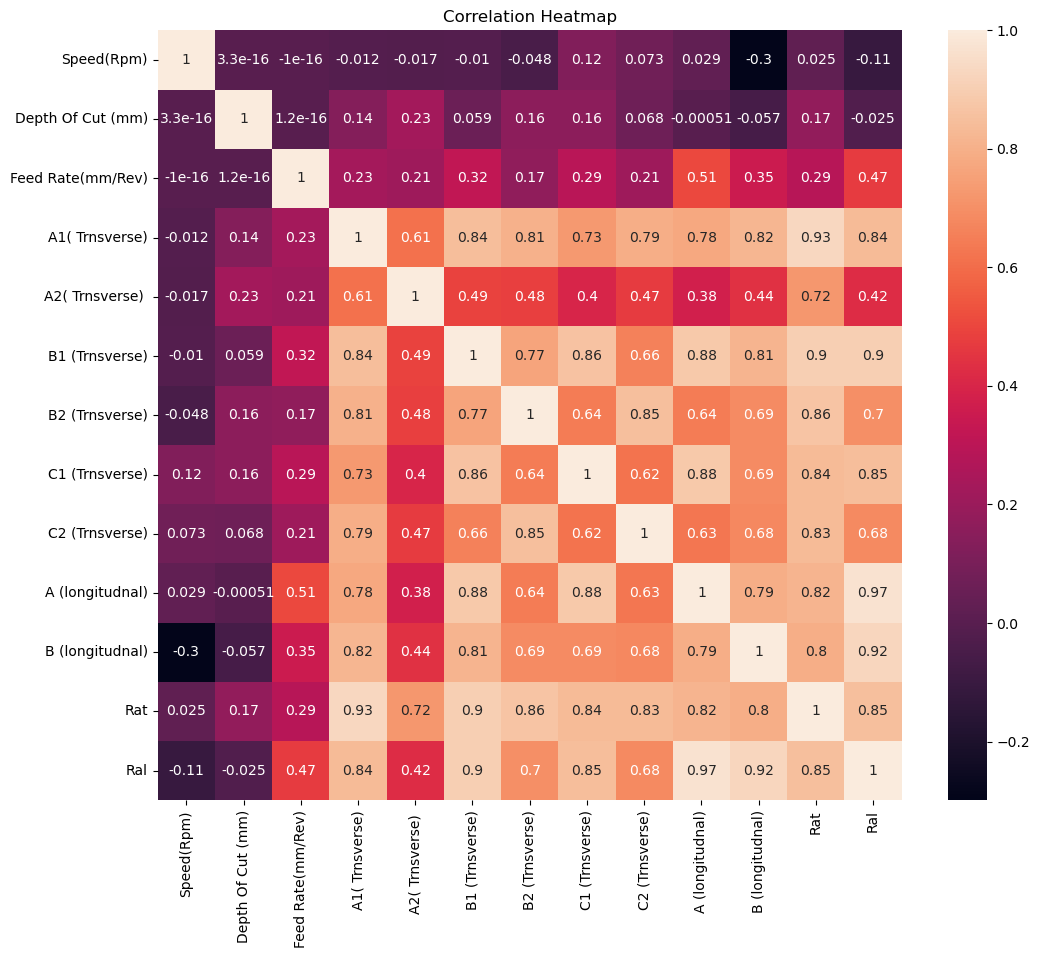

In [9]:
## Plotting the HeatMap for checking the Corelation between the Values
correlation_matrix = df_2.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

### In this HeatMap darker the colour less is the Corelation and Lighter the Colour Heigher is the Corelation with each other.
#### Conclusion from the HeatMap

### Checking for the description of the Data

In [10]:
## Checking the descriptive Statistics of the DataSet
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed(Rpm),27.0,1766.666667,209.394732,1500.000000,1500.00000,1800.000000,2000.0000,2000.000000
Depth Of Cut (mm),27.0,0.916667,0.317744,0.500000,0.50000,1.000000,1.2500,1.250000
Feed Rate(mm/Rev),27.0,0.180000,0.049923,0.120000,0.12000,0.180000,0.2400,0.240000
A1( Trnsverse),27.0,0.249963,0.135648,0.125000,0.15350,0.215000,0.2665,0.589000
A2( Trnsverse),27.0,0.225778,0.205467,0.051000,0.10000,0.138000,0.2875,0.940000
B1 (Trnsverse),27.0,0.259296,0.128337,0.095000,0.18500,0.224000,0.2695,0.560000
B2 (Trnsverse),27.0,0.191852,0.122062,0.075000,0.09750,0.144000,0.2375,0.535000
C1 (Trnsverse),27.0,0.268481,0.179552,0.110000,0.16400,0.215000,0.2565,0.844000
C2 (Trnsverse),27.0,0.191926,0.116344,0.070000,0.11500,0.144000,0.2340,0.465000
A (longitudnal),27.0,0.320296,0.199535,0.096000,0.19850,0.264000,0.4210,0.828000


In [11]:
## Checking for Datatypes of Columns
df_2.dtypes

Size                  object
Speed(Rpm)           float64
Depth Of Cut (mm)    float64
Feed Rate(mm/Rev)    float64
A1( Trnsverse)       float64
A2( Trnsverse)       float64
B1 (Trnsverse)       float64
B2 (Trnsverse)       float64
C1 (Trnsverse)       float64
C2 (Trnsverse)       float64
A (longitudnal)      float64
B (longitudnal)      float64
Rat                  float64
Ral                  float64
dtype: object

In [12]:
## Lets create the dummy variables for all the categorical columns
cat_col = ['Size']
df_3= pd.get_dummies(df_2,columns=cat_col,drop_first=True)
df_3.head()

,Speed(Rpm),Depth Of Cut (mm),Feed Rate(mm/Rev),A1( Trnsverse),A2( Trnsverse),B1 (Trnsverse),B2 (Trnsverse),C1 (Trnsverse),C2 (Trnsverse),A (longitudnal),B (longitudnal),Rat,Ral
0,1500.0,0.5,0.12,0.210,0.105,0.214,0.144,0.229,0.182,0.213,0.510,0.180667,0.3615
1,1500.0,0.5,0.18,0.184,0.095,0.146,0.101,0.208,0.193,0.314,0.435,0.154500,0.3745
2,1500.0,0.5,0.24,0.580,0.574,0.515,0.385,0.327,0.352,0.570,0.660,0.455500,0.6150
3,1500.0,1.0,0.12,0.267,0.208,0.227,0.249,0.233,0.117,0.197,0.370,0.216833,0.2835
4,1500.0,1.0,0.18,0.266,0.123,0.263,0.144,0.215,0.128,0.506,0.439,0.189833,0.4725


In [13]:
## Checking the Shape of Dtasaet after creating dummy variables for categorical Columns
df_3.shape

(27, 13)

## Modelling Part

In [14]:
## Assigning the X & Y values
y = df_3[['Ral']]
X = df_3.drop(columns=['Ral'])

- The StandardScaler is a popular data preprocessing technique used in machine learning and statistics. It is used to standardize features by subtracting the mean and scaling to unit variance. In other words, it transforms the data so that it has a mean of zero and a standard deviation of one.

- The formula for standardization is:

z = (x - u) / s

Where:
- z is the standardized value
- x is the original value
- u is the mean of the feature
- s is the standard deviation of the feature

- The StandardScaler calculates the mean and standard deviation of each feature in the dataset and then applies the above formula to transform each value. By doing so, it ensures that each feature has the same scale and brings all features to a similar range.

- Standardization is useful when working with algorithms that assume data to be normally distributed and have equal variances. It helps in cases where features have different scales, preventing certain features from dominating others during the learning process. It also helps with gradient-based optimization algorithms that converge faster when features are on a similar scale.

In [15]:
## Using scaler for scaling the Data
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
## Splitting the data into train & test format
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=13)

In [17]:
## Finding the length of test and train data
len(X_train),len(X_test),len(y_train),len(y_test)

(21, 6, 21, 6)

### Model Selection

Here we are using Regression Model as the Problem we are going to solve is Regression type as we have to predict continuous or numeric values.
Here we are going to use Random Forest Regressor because 
- Accuracy: Random Forest Regressor typically provides high prediction accuracy. It combines multiple decision trees and aggregates their predictions, resulting in more accurate and robust predictions compared to individual trees.

- Non-linearity: Random Forest Regressor can capture non-linear relationships between input features and the target variable. It is capable of handling complex interactions and non-linear patterns in the data, making it suitable for a wide range of regression problems.

- Resistance to overfitting: Random Forest Regressor reduces the risk of overfitting, which occurs when a model learns too much from the training data and performs poorly on new, unseen data. The randomness introduced during the construction of individual trees helps in decorrelating their predictions, leading to a reduction in overfitting.

- Robustness to outliers: Random Forest Regressor is less sensitive to outliers compared to some other regression algorithms. Outliers have a lesser impact on the overall model's performance because they are typically averaged out by the combination of multiple trees.

- Feature importance: Random Forest Regressor provides a measure of feature importance. By analyzing the importance scores assigned to different features, you can gain insights into which variables are most influential in the regression task. This information can be valuable for feature selection and understanding the underlying relationships in the data.

- Handling missing values: Random Forest Regressor can handle missing values in the dataset. It uses the available features to make predictions without requiring imputation or removal of instances with missing values. This is advantageous when dealing with real-world datasets that often contain missing data.

- Ease of use: Random Forest Regressor is relatively easy to use and implement. It does not require extensive data preprocessing or feature scaling and can handle both numerical and categorical features. Additionally, it has fewer hyperparameters to tune compared to some other algorithms.

In [18]:
## Selection of Model and Training the Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=13)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_regressor.predict(X_train)

# Calculate RMSE and R-squared for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
print("Training Set:")
print(' ')
print("Mean Squared Error:", mse_train)
print(' ')
print("Root Mean Squared Error:", rmse_train)
print(' ')
print("R-squared:", r2_train)
print("================================================================")

# Make predictions on the test set
y_test_pred = rf_regressor.predict(X_test)

# Calculate RMSE and R-squared for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
print("Testing  Set:")
print(' ')
print("Mean Squared Error:", mse_test)
print(' ')
print("Root Mean Squared Error:", rmse_test)
print(' ')
print("R-squared:", r2_test)

Training Set:
 
Mean Squared Error: 0.0003762474404761947
 
Root Mean Squared Error: 0.019397098764407907
 
R-squared: 0.9862042235498657
Testing  Set:
 
Mean Squared Error: 0.0006994509458333334
 
Root Mean Squared Error: 0.026447134926742697
 
R-squared: 0.953410314671729


### Conclusion
- On The Basic of above prediction we can see that the R-squared value of Training Set is 98.62% while that of Testing Set is 95.34%. So on the basic of that we can say that Our Model is performing well on the Data We collected and the Accuracy of the Model is 98%.
- So we can say that their is no overfitting condition as the R-squared value of the Training set is Heigher that the Testing Set.

### Prediction for the values

In [19]:
## Original Y_Test Values
y_test

,Ral
8,0.2780
19,0.2470
1,0.3745
11,0.2575
15,0.6050
7,0.3650


In [20]:
## Making prediction on target Column
y_test['Prediction'] = rf_regressor.predict(X_test)

In [21]:
## Predicted Values of Target Column
y_test

,Ral,Prediction
8,0.2780,0.296445
19,0.2470,0.259530
1,0.3745,0.331220
11,0.2575,0.296785
15,0.6050,0.593385
7,0.3650,0.377170


                              - - - - - - - - X X X X X X X X - - - - - - - -